### Initialize the raw data

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
from sklearn.metrics import r2_score
from matplotlib import ticker
import pandas as pd
import sympy as sp
from scipy.interpolate import CubicSpline

t=[i/2 for i in range(11)]
p=1e-5*np.array([3,6.4,9.6,14,16,19,22,26,29,32,35])

### Ready to plot it!

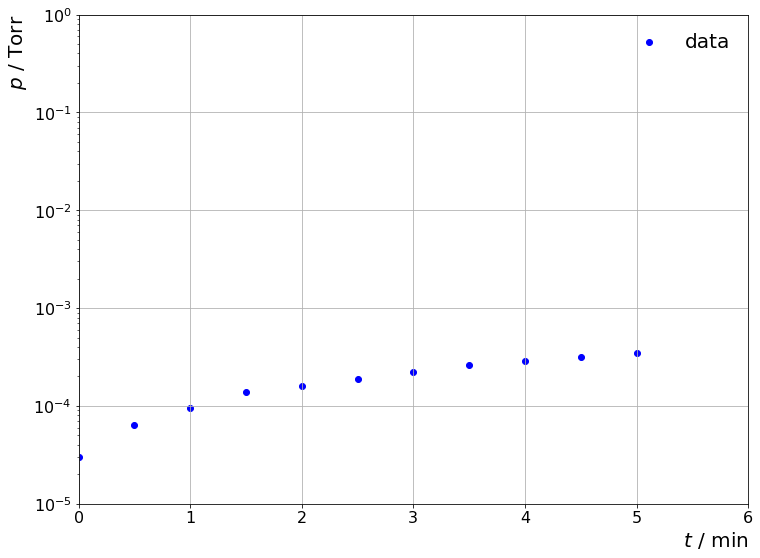

In [81]:
#plt.scatter(x, y, label='data')
fig=plt.figure(figsize=(12,9))
ax = fig.add_subplot(111)
plt.grid(True)



plt.scatter(t, p, label='data', color='blue')
#plt.plot(np.linspace(2000,4600,200), P_H(np.linspace(2000,4600,200)), linestyle='dashed', label='interpolation', color='red')


plt.xlabel(r'$t\ /\rm\ min$', fontsize=20,horizontalalignment='right',x=1) 
plt.ylabel(r'$p\ /\rm\ Torr$', fontsize=20,rotation=90,horizontalalignment='right',y=1)
plt.yscale('log') 
#plt.xlabel(r'$\rmI\ /\ A$', fontsize=16, color="black") 
ax.tick_params(axis='both', direction='out',labelsize=16) 
plt.xlim(0,6)
#ax.set_ylim(0,500)
plt.ylim(1e-5,1)
#ax.yaxis.label.set_color('red') 
#x_major_locator=MultipleLocator(1)
#y_major_locator=MultipleLocator(50)
#ax.xaxis.set_major_locator(x_major_locator)
#ax.yaxis.set_major_locator(y_major_locator)



ax.legend(loc='best', frameon=False, fontsize=20)
#plt.title(r"$\rm P_{IR}-I$ Distribution & Conversion Efficiency from $\rm P_{LD}$ to $\rm P_{IR}$", fontsize=18)
#plt.axis([30, 400, 100, 400])
#plt.plot(myline, mymodel(myline), color = 'green', linestyle='dashed', label='Linear Fit')
#plt.text(0.5, 1400,r"$y=%.5fx%.5f$"%(a1,a0), fontsize=16,color="green")

plt.savefig('phyex1_fig1.pdf',bbox_inches='tight')
plt.show()

In [82]:
p1=1e-3*np.array([1.30,2.15,3.00,3.82,4.61,5.42,6.38,7.22,8.20,9.10])
p2=1e-2*np.array([1.22,1.58,1.90,2.22,2.60,3.00,3.38,3.70,4.10,4.50,4.90,5.30,5.75,6.15,6.55,6.95,7.30,7.70,8.10,8.50,8.91,9.31,9.75])
p3=1e-1*np.array([1.38,1.70,2.10,2.43,2.80,3.20,3.58,4.00,4.30,4.60,4.95,5.25,5.63,6.02,6.40,6.70,7.02,7.35,7.65,7.96,8.25,8.57,8.82,9.10,9.39,9.62,9.88])
p=np.concatenate((p1,p2,p3))
n=[i for i in range(60)]
p_th=[0 for _ in range(60)]

V0=1.475
V1=2690
p0=1.50
p_th[0]=1.3e-3
for i in range(9):
    p_th[i+1]=(p0*V0+p_th[i]*V1)/(V0+V1)

V0=7.350
V1=2690
p0=1.50
p_th[10]=1.22e-2
for i in range(10,32):
    p_th[i+1]=(p0*V0+p_th[i]*V1)/(V0+V1)
    
V0=7.350
V1=2690
p0=12.22
p_th[33]=1.38e-1
for i in range(33,59):
    p_th[i+1]=(p0*V0+p_th[i]*V1)/(V0+V1)

max_relative_error=max(abs(p_th-p)/p_th)
print(max_relative_error)

0.0911668814755195


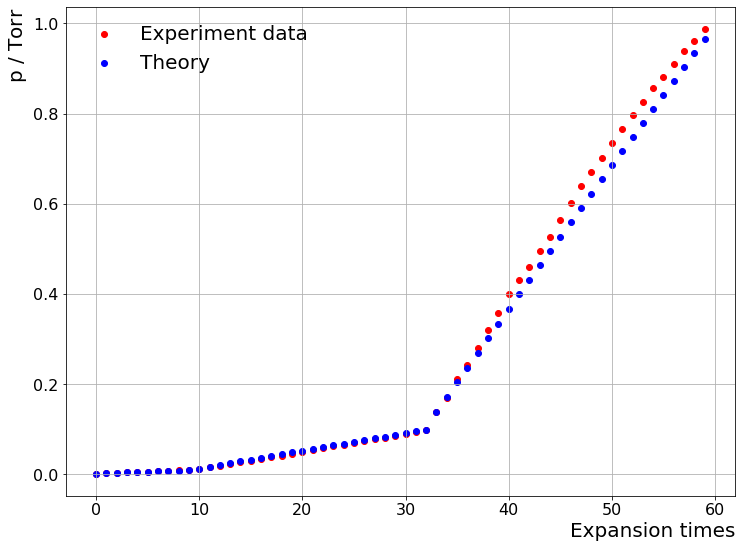

In [83]:
#plt.scatter(x, y, label='data')
fig=plt.figure(figsize=(12,9))
ax = fig.add_subplot(111)
plt.grid(True)



plt.scatter(n, p, label='Experiment data', color='red')
plt.scatter(n, p_th, label='Theory', color='blue')
#plt.plot(np.linspace(2000,4600,200), P_H(np.linspace(2000,4600,200)), linestyle='dashed', label='interpolation', color='red')


plt.xlabel('Expansion times', fontsize=20,horizontalalignment='right',x=1) 
plt.ylabel(r'$\rm p\ /\ Torr$', fontsize=20,rotation=90,horizontalalignment='right',y=1)
#plt.yscale('log')
#plt.xlabel(r'$\rmI\ /\ A$', fontsize=16, color="black") 
ax.tick_params(axis='both', direction='out',labelsize=16) 
#plt.xlim(0,6)
#ax.set_ylim(0,500)
#plt.ylim(1e-5,1)
#ax.yaxis.label.set_color('red') 
#x_major_locator=MultipleLocator(1)
#y_major_locator=MultipleLocator(50)
#ax.xaxis.set_major_locator(x_major_locator)
#ax.yaxis.set_major_locator(y_major_locator)



ax.legend(loc='best', frameon=False, fontsize=20)
#plt.title(r"$\rm P_{IR}-I$ Distribution & Conversion Efficiency from $\rm P_{LD}$ to $\rm P_{IR}$", fontsize=18)
#plt.axis([30, 400, 100, 400])
#plt.plot(myline, mymodel(myline), color = 'green', linestyle='dashed', label='Linear Fit')
#plt.text(0.5, 1400,r"$y=%.5fx%.5f$"%(a1,a0), fontsize=16,color="green")

plt.savefig('phyex1_fig2.pdf',bbox_inches='tight')
plt.show()

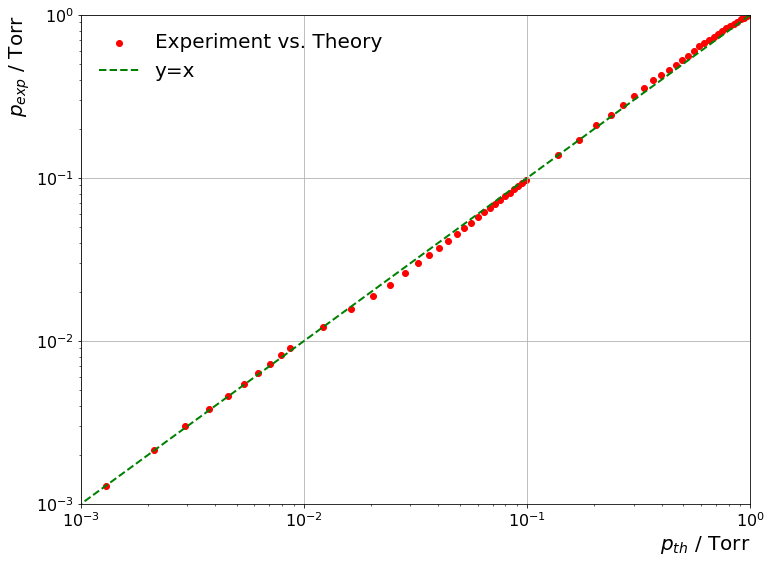

In [84]:
#plt.scatter(x, y, label='data')
fig=plt.figure(figsize=(12,9))
ax = fig.add_subplot(111)
plt.grid(True)



plt.scatter(p_th, p, color='red', label='Experiment vs. Theory')
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100), linestyle='dashed', linewidth=2, color='green', label='y=x')
#plt.plot(np.linspace(2000,4600,200), P_H(np.linspace(2000,4600,200)), linestyle='dashed', label='interpolation', color='red')


plt.xlabel(r'$p_{th}\ /\rm\ Torr$', fontsize=20,horizontalalignment='right',x=1) 
plt.ylabel(r'$p_{exp}\ /\rm\ Torr$', fontsize=20,rotation=90,horizontalalignment='right',y=1)
plt.yscale('log')
plt.xscale('log')
#plt.xlabel(r'$\rmI\ /\ A$', fontsize=16, color="black") 
ax.tick_params(axis='both', direction='out',labelsize=16) 
plt.xlim(1e-3,1)
plt.ylim(1e-3,1)
#ax.set_ylim(0,500)
#plt.ylim(1e-5,1)
#ax.yaxis.label.set_color('red') 
#x_major_locator=MultipleLocator(1)
#y_major_locator=MultipleLocator(50)
#ax.xaxis.set_major_locator(x_major_locator)
#ax.yaxis.set_major_locator(y_major_locator)



ax.legend(loc='best', frameon=False, fontsize=20)
#plt.title(r"$\rm P_{IR}-I$ Distribution & Conversion Efficiency from $\rm P_{LD}$ to $\rm P_{IR}$", fontsize=18)
#plt.axis([30, 400, 100, 400])
#plt.plot(myline, mymodel(myline), color = 'green', linestyle='dashed', label='Linear Fit')
#plt.text(0.5, 1400,r"$y=%.5fx%.5f$"%(a1,a0), fontsize=16,color="green")

plt.savefig('phyex1_fig3.pdf',bbox_inches='tight')
plt.show()